## Lead Scoring Case Study

An education company named X Education provides online courses to working professionals. Generally, there are many visitors on their website browsing for courses. The company markets its courses on several websites and search engines. Then there are several probabilities: some of the visitors browse the website or they fill up the form or watch some videos. Also, the company gets some leads through past referrals. Then the company initiates its marketing campaigns based on the acquired leads. The conversion rate of leads to enrollment is as low as 30%. The CEO sets the target conversion rate to 80%.

#### Objective of the case study: 

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. 
- Handle other problems presented by the company by the model in order to adjust according to the changes in the company's future requirements. 

#### Read and understanding of the dataset "Leads.csv"

In [1]:
# Supress unnecessary warnings 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries 
import numpy as np, pandas as pd

In [3]:
# Read the Leads.csv file
df_leads = pd.read_csv("Leads.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 1000)

In [4]:
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
df_leads.shape

(9240, 37)

In [6]:
df_leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# Check the info to know the feature varaible types and the presence of null values 
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Check for the missing values in every column
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

The number of rows in the dataset are 9240 and there are some columns having almost 50% of missing values. Following the usual criteria in a data cleaning or exploratory data analysis, the columns having more than 30% or 40% of missing values can be removed from the dataframe. Therefore, the columns having more than 3000 missing values can be eliminated from the df_leads dataframe.   

In [9]:
# Drop all the columns having greater than 3000 missing values 
for column in df_leads.columns:
    if df_leads[column].isnull().sum() > 3000:
        df_leads.drop(column, 1, inplace = True)

In [10]:
# Check the dataframe for null values again
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Since the courses are offered online, the variables "City" and "Country" is not important for the sales or marketing purpose. Hence, these columns can also be dropped for the analysis. Also, the features "Prospect ID" and "Lead Number" will not useful for analysis as they are for individual identification. Hence, dropping them will be more helpful. 

In [11]:
# Drop "City", "Country", "Prospect ID" and "Lead Number" columns from the dataframe
df_leads.drop(["City", "Country", "Prospect ID", "Lead Number"], axis = 1, inplace = True)

In [12]:
# Check the percentage of missing values in the dataframe
round((df_leads.isnull().sum()/len(df_leads.index)) * 100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [13]:
df_leads.head(100)

Lead Origin       Lead Source Do Not Email Do Not Call  \
0                       API        Olark Chat           No          No   
1                       API    Organic Search           No          No   
2   Landing Page Submission    Direct Traffic           No          No   
3   Landing Page Submission    Direct Traffic           No          No   
4   Landing Page Submission            Google           No          No   
5                       API        Olark Chat           No          No   
6   Landing Page Submission            Google           No          No   
7                       API        Olark Chat           No          No   
8   Landing Page Submission    Direct Traffic           No          No   
9                       API            Google           No          No   
10  Landing Page Submission    Organic Search           No          No   
11  Landing Page Submission    Direct Traffic           No          No   
12                      API    Organic Search           No          No   
13  Landing Page Submission    Organic Search           No          No   
14  Landing Page Submission    Direct Traffic          Yes          No   
15                      API    Organic Search           No          No   
16                      API        Olark Chat           No          No   
17                      API    Referral Sites           No          No   
18  Landing Page Submission            Google           No          No   
19                      API    Organic Search           No          No   
20  Landing Page Submission            Google           No          No   
21                      API            Google           No          No   
22  Landing Page Submission            Google           No          No   
23  Landing Page Submission            Google           No          No   
24                      API            Google           No          No   
25  Landing Page Submission            Google           No          No   
26  Landing Page Submission    Organic Search           No          No   
27  Landing Page Submission            Google           No          No   
28  Landing Page Submission    Direct Traffic           No          No   
29                      API            Google           No          No   
30  Landing Page Submission    Direct Traffic           No          No   
31                      API            Google           No          No   
32                      API    Referral Sites           No          No   
33                      API    Organic Search           No          No   
34  Landing Page Submission    Organic Search           No          No   
35                      API    Referral Sites           No          No   
36  Landing Page Submission            Google           No          No   
37  Landing Page Submission            Google           No          No   
38                      API            Google           No          No   
39  Landing Page Submission            Google           No          No   
40                      API    Direct Traffic           No          No   
41  Landing Page Submission    Organic Search          Yes          No   
42                      API            Google           No          No   
43  Landing Page Submission            Google           No          No   
44  Landing Page Submission    Direct Traffic           No          No   
45  Landing Page Submission            Google           No          No   
46  Landing Page Submission    Direct Traffic           No          No   
47                      API        Olark Chat           No          No   
48                      API            Google           No          No   
49                      API        Olark Chat           No          No   
50                      API        Olark Chat           No          No   
51  Landing Page Submission            Google           No          No   
52  Landing Page Submission    Organic Search           No          No   
53                  

There are some columns which have a category as "Select" implying that the visitor on the website did not select any option for that particular feature. The "Select" values can also be treated as the missing values and hence it would be useful to get the value counts. 

In [14]:
# Print value counts of features in all the categorical columns
for feature in df_leads:
    print(df_leads[feature].astype('category').value_counts())
    print('------------------------------------------------------------')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
------------------------------------------------------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
------------------------------------------------------------
No     8506
Yes     734
Name: Do Not Email, dtype: int64
---------------------------------------------------

On checking for the value counts in the categorical features, the columns "Specialization", " How did you hear about X Education" and "Lead Profile" have the values of 'Select'. Hence, due to the high number of 'Select' values, the columns "How did you hear about X Education" and "Lead Profile" can be dropped for the analysis.

In [15]:
df_leads.drop(['How did you hear about X Education', 'Lead Profile'], axis = 1, inplace = True)

On checking for the value counts for the categorical features of the dataframe, there are several columns or features which have almost all value counts of 'No'. The columns "Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque" can be dropped as they do not prove to be useful for analysis. Also, the feature "What matters most to you in choosing a course" has 6528 counts of "Better Career Prospects" and only 2 counts of "Flexibility & Convenience" and one count of "Other". Hence, this column can also be dropped along with the above mentioned columns. 

In [16]:
# Drop the columns having almost all 'No' value counts
df_leads.drop(['What matters most to you in choosing a course', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis = 1, inplace = True) 

In [17]:
# Check for the null values in the dataframe
df_leads.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

The features "Specialization" and "What is your current occupation" are still very important even after having so many null values. These features help in identifying the target customers and so the alternative here would be to drop the rows from the dataframe having null values. 

In [18]:
# Dropping only the rows with null values in the remaining columns
for row in df_leads.columns:
    df_leads = df_leads[~pd.isnull(df_leads[row])]

In [19]:
# Check for the null value counts
df_leads.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [20]:
# Check for the percentage of rows retained
print((len(df_leads.index) * 100)/9240)

68.97186147186147


Around 69% of rows have been retained which still makes it eligible for analysis. 

In [21]:
# Print the head of the dataframe
df_leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

### Data preparation for modelling

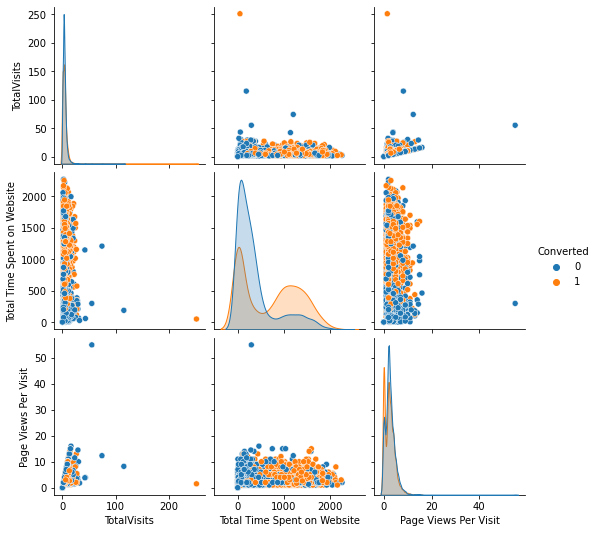

In [22]:
# import libraries for plots
import matplotlib.pyplot as plt, seaborn as sns
sns.pairplot(df_leads, hue = 'Converted')
plt.show()

#### Dummy variable creation

Looking back at the dataframe, the categorical features for which dummy variables have to be created are "Lead Origin", "Lead Source", "Do Not Email", "Last Activity", "What is your current occupation", "A free copy of Mastering The Interview" and "Last Notable Activity". 

In [23]:
# Create dummy variables 
df_leads_dummy = pd.get_dummies(df_leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first = True)

In [24]:
# Add the dummy variables to the original dataframe 
df_leads = pd.concat([df_leads, df_leads_dummy], axis = 1)

A separate dummy variable for the "Specialization" feature needs to be created from which the 'Select' values have to be dropped as they are not useful for the analysis. 

In [25]:
# Create dummy variable separately for "Specialization" and drop the 'Select' dummy variables
specialization_dummy = pd.get_dummies(df_leads['Specialization'], prefix = 'Specialization')
specialization_dummy = specialization_dummy.drop(['Specialization_Select'], 1)
df_leads = pd.concat([df_leads, specialization_dummy], axis = 1)

In [26]:
# Drop the original variables after the creation of dummy variables for them
df_leads = df_leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [27]:
# Print the head of the dataframe
df_leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   Do Not Email_Yes  Last Activity_Converted to Lead  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2         

#### Train-test split

In [28]:
# Import the necessary libraries for train-test split
from sklearn.model_selection import train_test_split

In [29]:
# Include all feature varibales in X
X = df_leads.drop(['Converted'], 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   Do Not Email_Yes  Last Activity_Converted to Lead  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3       

In [30]:
# Include the target variable "Converted" in y
y = df_leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [31]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#### Feature Scaling

In [32]:
# Import the library for scaling the numerical features
from sklearn.preprocessing import MinMaxScaler

In [33]:
# Scale the numerical features in the dataframe
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8003     0.015936                     0.029489                 0.125   
218      0.015936                     0.082306                 0.250   
4171     0.023904                     0.034331                 0.375   
4037     0.000000                     0.000000                 0.000   
3660     0.000000                     0.000000                 0.000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8003                                    1                          0   
218                                     1                          0   
4171                                    1                          0   
4037                                    0                          0   
3660                                    0                          1   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
8003                        0                           1   
218                         0                           1   
4171                        0                           1   
4037                        0                           0   
3660                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
8003                     0                   0                      0   
218                      0                   0                      0   
4171                     0                   0                      0   
4037                     0                   0                      0   
3660                     0                   0                      0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
8003                       0                           0   
218                        0                           0   
4171                       0                           0   
4037                       1                           0   
3660                       0                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
8003                              0                          0   
218                               0                          0   
4171                              0                          0   
4037                              0                          0   
3660                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
8003                      0                           0   
218                       0                           0   
4171                      0                           0   
4037                      0                           0   
3660                      1                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
8003                         0                    0   
218                          0                    0   
4171                         0                    0   
4037                         0                    0   
3660                         0                    0   

      Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
8003                             0                 0                    0   
218                              0                 0                    0   
4171                             0                 0                    0   
4037                             0                 0                    0   
3660                             0                 0                    0   

      Do Not Email_Yes  Last Activity_Converted to Lead  \
8003                 0                                0   
218                  0                                0   
4171                 0                                0   
4037                 0                                0   
3660                 0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
8

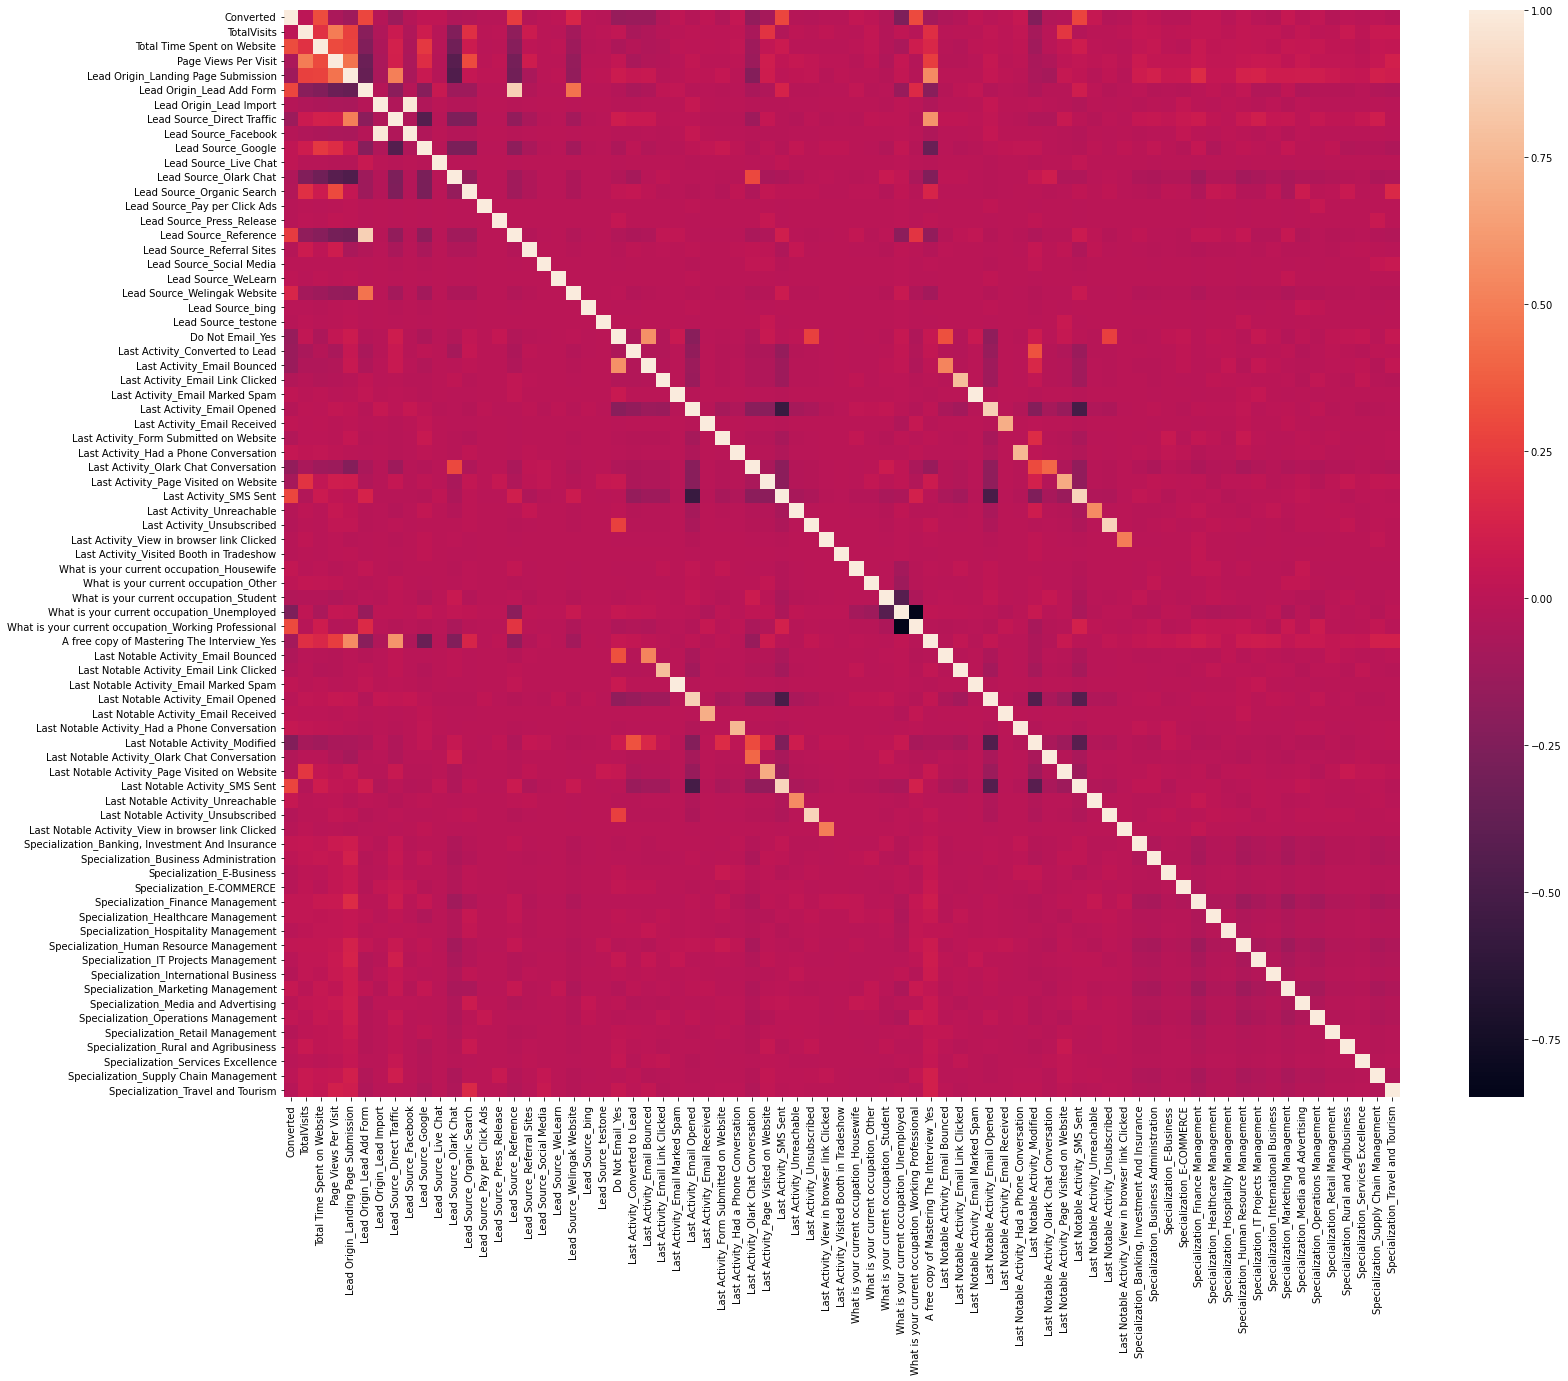

In [34]:
# Visualize the correlation
plt.figure(figsize = (25,20))
sns.heatmap(df_leads.corr())
plt.show()

### Model Building

In [35]:
# Import the library for logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [36]:
# Import RFE library 
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)                   # run RFE with 20 variables as output 
rfe = rfe.fit(X_train, y_train)

In [37]:
# Print features selected by RFE 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 47),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 46),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Live Chat', False, 39),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Pay per Click Ads', False, 38),
 ('Lead Source_Press_Release', False, 48),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Social Media', False, 53),
 ('Lead Source_WeLearn', False, 37),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 28),
 ('Lead Source_testone', False, 33),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 20),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Cl

In [38]:
# Segregate the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [39]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [40]:
# Import statsmodel library
import statsmodels.api as sm

In [41]:
# Fit a logistic regression model on X_train after addition of a constant
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4440
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2019.4
Date:                Tue, 27 Dec 2022   Deviance:                       4038.7
Time:                        19:39:55   Pearson chi2:                 4.69e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3810
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7083      0.607     -1.166      0.244      -1.899       0.482
TotalVisits                                              8.6822      2.585      3.359      0.001       3.615      13.749
Total Time Spent on Website                              4.4003      0.187     23.550      0.000       4.034       4.766
Lead Origin_Lead Add Form                                2.9442      1.210      2.433      0.015       0.572       5.316
Lead Source_Olark Chat                                   1.5531      0.127     12.219      0.000       1.304       1.802
Lead Source_Reference                                    1.2610      1.233      1.023      0.306      -1.156       3.678
Lead Source_Welingak Website                             3.3115      1.573      2.106      0.035       0.229       6.394
Do Not Email_Yes                                        -1.4072      0.223     -6.310      0.000      -1.844      -0.970
Last Activity_Email Bounced                             -1.0803      0.662     -1.631      0.103      -2.378       0.218
Last Activity_Had a Phone Conversation                   1.4850      0.984      1.510      0.131      -0.443       3.413
Last Activity_Olark Chat Conversation                   -0.6503      0.192     -3.393      0.001      -1.026      -0.275
Last Activity_SMS Sent                                   0.9648      0.086     11.232      0.000       0.796       1.133
What is your current occupation_Housewife               22.5870    2.4e+04      0.001      0.999    -4.7e+04     4.7e+04
What is your current occupation_Student                 -1.1422      0.640     -1.785      0.074      -2.396       0.112
What is your current occupation_Unemployed              -1.3134      0.601     -2.184      0.029      -2.492      -0.135
What is your current occupation_Working Professional     1.2988      0.631      2.058      0.040       0.062       2.536
Last Notable Activity_Email Bounced                      1.4182      0.798      1.778      0.075      -0.145       2.982
Last Notable Activity_Had a Phone Conversation          22.3445   2.12e+04      0.001      0.999   -4.15e+04    4.16e+04
Last Notable Activity_Modified                          -0.7018      0.095     -7.414      0.000      -0.887      -0.516
Last Notable Activity_Unreachable                        2.5031      0.808      3.099      0.002       0.920       4.086
Specialization_Banking, Investment And Insurance         0.5498      0.204      2.692      0.007       0.150       0.950
========================================================================================================================
"""

Before eliminating the variables on the basis of p-values, information on the variance inflation factors (VIF).  

In [42]:
# Import library for the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
# Print VIFs for all the variables of the dataframe
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
2                              Lead Origin_Lead Add Form  84.21
4                                  Lead Source_Reference  65.21
5                           Lead Source_Welingak Website  20.03
13            What is your current occupation_Unemployed   4.63
8                 Last Activity_Had a Phone Conversation   2.45
16        Last Notable Activity_Had a Phone Conversation   2.45
1                            Total Time Spent on Website   2.40
7                            Last Activity_Email Bounced   2.01
17                        Last Notable Activity_Modified   1.77
10                                Last Activity_SMS Sent   1.74
6                                       Do Not Email_Yes   1.65
14  What is your current occupation_Working Professional   1.65
0                                            TotalVisits   1.64
3                                 Lead Source_Olark Chat   1.54
15                   Last Notable Activity_Email Bounced   1.41
9                  Last Activity_Olark Chat Conversation   1.30
12               What is your current occupation_Student   1.12
19      Specialization_Banking, Investment And Insurance   1.05
11             What is your current occupation_Housewife   1.01
18                     Last Notable Activity_Unreachable   1.01

Only the features "Lead Origin_Lead Add Form", "Lead Source_Reference" and "Lead Source_Reference" and "Lead Source_Welingak Website" have very high VIFs but all the other features desirably have <5 VIFs. The feature "Lead Source_Reference" is dropped first because of its high p-value and VIF.

In [44]:
# Drop the "Lead Source_Reference" feature
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [45]:
# Fit the model again with the new set of feaatures
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4441
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2019.8
Date:                Tue, 27 Dec 2022   Deviance:                       4039.6
Time:                        19:40:05   Pearson chi2:                 4.67e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3809
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7076      0.607     -1.165      0.244      -1.898       0.483
TotalVisits                                              8.6793      2.585      3.357      0.001       3.612      13.746
Total Time Spent on Website                              4.4003      0.187     23.549      0.000       4.034       4.766
Lead Origin_Lead Add Form                                4.1668      0.260     16.019      0.000       3.657       4.677
Lead Source_Olark Chat                                   1.5529      0.127     12.217      0.000       1.304       1.802
Lead Source_Welingak Website                             2.0887      1.037      2.014      0.044       0.056       4.121
Do Not Email_Yes                                        -1.4049      0.223     -6.306      0.000      -1.842      -0.968
Last Activity_Email Bounced                             -1.0819      0.662     -1.634      0.102      -2.380       0.216
Last Activity_Had a Phone Conversation                   1.4853      0.984      1.510      0.131      -0.443       3.413
Last Activity_Olark Chat Conversation                   -0.6498      0.192     -3.391      0.001      -1.025      -0.274
Last Activity_SMS Sent                                   0.9649      0.086     11.234      0.000       0.797       1.133
What is your current occupation_Housewife               22.5884    2.4e+04      0.001      0.999    -4.7e+04    4.71e+04
What is your current occupation_Student                 -1.1419      0.640     -1.785      0.074      -2.396       0.112
What is your current occupation_Unemployed              -1.3143      0.601     -2.186      0.029      -2.493      -0.136
What is your current occupation_Working Professional     1.2990      0.631      2.059      0.039       0.062       2.536
Last Notable Activity_Email Bounced                      1.4176      0.798      1.777      0.076      -0.146       2.981
Last Notable Activity_Had a Phone Conversation          22.3444   2.12e+04      0.001      0.999   -4.15e+04    4.16e+04
Last Notable Activity_Modified                          -0.7020      0.095     -7.417      0.000      -0.887      -0.516
Last Notable Activity_Unreachable                        2.5036      0.808      3.099      0.002       0.920       4.087
Specialization_Banking, Investment And Insurance         0.5506      0.204      2.697      0.007       0.150       0.951
========================================================================================================================
"""

In [46]:
# Print the VIFs of the variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12            What is your current occupation_Unemployed  4.63
15        Last Notable Activity_Had a Phone Conversation  2.45
7                 Last Activity_Had a Phone Conversation  2.45
1                            Total Time Spent on Website  2.39
6                            Last Activity_Email Bounced  2.01
16                        Last Notable Activity_Modified  1.77
9                                 Last Activity_SMS Sent  1.74
2                              Lead Origin_Lead Add Form  1.71
5                                       Do Not Email_Yes  1.65
13  What is your current occupation_Working Professional  1.65
0                                            TotalVisits  1.64
3                                 Lead Source_Olark Chat  1.54
14                   Last Notable Activity_Email Bounced  1.41
4                           Lead Source_Welingak Website  1.33
8                  Last Activity_Olark Chat Conversation  1.30
11               What is your current occupation_Student  1.12
18      Specialization_Banking, Investment And Insurance  1.05
10             What is your current occupation_Housewife  1.01
17                     Last Notable Activity_Unreachable  1.01

All the variables have VIF <5. The features elimination can be done solely on p-values from now.

In [47]:
# Drop "Last Notable Activity_Had a Phone Conversation" because of high p-value
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [48]:
# Fit the model again with new set of features
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4442
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.6
Date:                Tue, 27 Dec 2022   Deviance:                       4043.2
Time:                        19:40:19   Pearson chi2:                 4.67e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3804
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7046      0.607     -1.160      0.246      -1.895       0.486
TotalVisits                                              8.7256      2.586      3.374      0.001       3.658      13.794
Total Time Spent on Website                              4.3956      0.187     23.529      0.000       4.029       4.762
Lead Origin_Lead Add Form                                4.1678      0.260     16.019      0.000       3.658       4.678
Lead Source_Olark Chat                                   1.5524      0.127     12.212      0.000       1.303       1.802
Lead Source_Welingak Website                             2.0879      1.037      2.013      0.044       0.055       4.121
Do Not Email_Yes                                        -1.4054      0.223     -6.309      0.000      -1.842      -0.969
Last Activity_Email Bounced                             -1.0741      0.662     -1.622      0.105      -2.372       0.224
Last Activity_Had a Phone Conversation                   2.6597      0.801      3.320      0.001       1.089       4.230
Last Activity_Olark Chat Conversation                   -0.6449      0.192     -3.365      0.001      -1.020      -0.269
Last Activity_SMS Sent                                   0.9636      0.086     11.220      0.000       0.795       1.132
What is your current occupation_Housewife               21.5890   1.46e+04      0.001      0.999   -2.85e+04    2.86e+04
What is your current occupation_Student                 -1.1433      0.640     -1.787      0.074      -2.397       0.111
What is your current occupation_Unemployed              -1.3146      0.601     -2.186      0.029      -2.493      -0.136
What is your current occupation_Working Professional     1.2978      0.631      2.057      0.040       0.061       2.534
Last Notable Activity_Email Bounced                      1.4085      0.798      1.766      0.077      -0.155       2.972
Last Notable Activity_Modified                          -0.7111      0.095     -7.523      0.000      -0.896      -0.526
Last Notable Activity_Unreachable                        2.5009      0.808      3.096      0.002       0.918       4.084
Specialization_Banking, Investment And Insurance         0.5644      0.203      2.776      0.005       0.166       0.963
========================================================================================================================
"""

In [49]:
# Drop "What is your current occupation_Housewife" feature because of high p-value
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [50]:
# Fit the model again with the new set of features
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4443
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.9
Date:                Tue, 27 Dec 2022   Deviance:                       4047.7
Time:                        19:40:22   Pearson chi2:                 4.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3797
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1300      0.558     -0.233      0.816      -1.224       0.964
TotalVisits                                              8.5476      2.574      3.321      0.001       3.503      13.592
Total Time Spent on Website                              4.3937      0.187     23.527      0.000       4.028       4.760
Lead Origin_Lead Add Form                                4.1644      0.260     16.013      0.000       3.655       4.674
Lead Source_Olark Chat                                   1.5476      0.127     12.185      0.000       1.299       1.797
Lead Source_Welingak Website                             2.0878      1.037      2.013      0.044       0.055       4.121
Do Not Email_Yes                                        -1.4095      0.223     -6.317      0.000      -1.847      -0.972
Last Activity_Email Bounced                             -1.0726      0.662     -1.620      0.105      -2.370       0.225
Last Activity_Had a Phone Conversation                   2.6604      0.801      3.321      0.001       1.090       4.230
Last Activity_Olark Chat Conversation                   -0.6447      0.192     -3.365      0.001      -1.020      -0.269
Last Activity_SMS Sent                                   0.9635      0.086     11.220      0.000       0.795       1.132
What is your current occupation_Student                 -1.7140      0.595     -2.880      0.004      -2.880      -0.548
What is your current occupation_Unemployed              -1.8852      0.554     -3.405      0.001      -2.970      -0.800
What is your current occupation_Working Professional     0.7269      0.585      1.242      0.214      -0.420       1.874
Last Notable Activity_Email Bounced                      1.4114      0.798      1.770      0.077      -0.152       2.975
Last Notable Activity_Modified                          -0.7104      0.094     -7.523      0.000      -0.896      -0.525
Last Notable Activity_Unreachable                        2.4982      0.808      3.092      0.002       0.914       4.082
Specialization_Banking, Investment And Insurance         0.5645      0.203      2.777      0.005       0.166       0.963
========================================================================================================================
"""

In [51]:
# Drop "What is your current occupation_Working Professional" because of high p-value
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [52]:
# Fit the model again with the new set of features
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2024.6
Date:                Tue, 27 Dec 2022   Deviance:                       4049.1
Time:                        19:40:25   Pearson chi2:                 4.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3795
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.5271      0.201      2.616      0.009       0.132       0.922
TotalVisits                                          8.4564      2.569      3.292      0.001       3.422      13.491
Total Time Spent on Website                          4.3939      0.187     23.525      0.000       4.028       4.760
Lead Origin_Lead Add Form                            4.1646      0.260     16.016      0.000       3.655       4.674
Lead Source_Olark Chat                               1.5470      0.127     12.187      0.000       1.298       1.796
Lead Source_Welingak Website                         2.0861      1.037      2.012      0.044       0.053       4.119
Do Not Email_Yes                                    -1.4102      0.223     -6.317      0.000      -1.848      -0.973
Last Activity_Email Bounced                         -1.0579      0.660     -1.603      0.109      -2.352       0.236
Last Activity_Had a Phone Conversation               2.6645      0.801      3.327      0.001       1.095       4.234
Last Activity_Olark Chat Conversation               -0.6403      0.191     -3.345      0.001      -1.015      -0.265
Last Activity_SMS Sent                               0.9673      0.086     11.279      0.000       0.799       1.135
What is your current occupation_Student             -2.3709      0.289     -8.203      0.000      -2.937      -1.804
What is your current occupation_Unemployed          -2.5421      0.189    -13.449      0.000      -2.913      -2.172
Last Notable Activity_Email Bounced                  1.4057      0.795      1.767      0.077      -0.153       2.965
Last Notable Activity_Modified                      -0.7117      0.094     -7.536      0.000      -0.897      -0.527
Last Notable Activity_Unreachable                    2.4995      0.808      3.093      0.002       0.916       4.083
Specialization_Banking, Investment And Insurance     0.5663      0.203      2.787      0.005       0.168       0.965
====================================================================================================================
"""

In [53]:
# Drop "Last Activity_Email Bounced" because of high p-value
X_train.drop('Last Activity_Email Bounced', axis = 1, inplace = True)

In [54]:
# Fit the model again with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2026.2
Date:                Tue, 27 Dec 2022   Deviance:                       4052.3
Time:                        19:40:28   Pearson chi2:                 4.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3791
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.5173      0.201      2.575      0.010       0.124       0.911
TotalVisits                                          8.7289      2.567      3.400      0.001       3.697      13.761
Total Time Spent on Website                          4.3928      0.187     23.532      0.000       4.027       4.759
Lead Origin_Lead Add Form                            4.1835      0.260     16.077      0.000       3.673       4.694
Lead Source_Olark Chat                               1.5457      0.127     12.181      0.000       1.297       1.794
Lead Source_Welingak Website                         2.0916      1.038      2.016      0.044       0.058       4.125
Do Not Email_Yes                                    -1.5394      0.211     -7.291      0.000      -1.953      -1.126
Last Activity_Had a Phone Conversation               2.6716      0.801      3.334      0.001       1.101       4.242
Last Activity_Olark Chat Conversation               -0.6206      0.191     -3.246      0.001      -0.995      -0.246
Last Activity_SMS Sent                               0.9790      0.086     11.439      0.000       0.811       1.147
What is your current occupation_Student             -2.3658      0.289     -8.198      0.000      -2.931      -1.800
What is your current occupation_Unemployed          -2.5369      0.188    -13.468      0.000      -2.906      -2.168
Last Notable Activity_Email Bounced                  0.4783      0.519      0.922      0.357      -0.539       1.495
Last Notable Activity_Modified                      -0.7328      0.094     -7.810      0.000      -0.917      -0.549
Last Notable Activity_Unreachable                    2.5000      0.808      3.094      0.002       0.916       4.084
Specialization_Banking, Investment And Insurance     0.5659      0.203      2.784      0.005       0.168       0.964
====================================================================================================================
"""

In [55]:
# Drop "Last Notable Actvitiy_Email Bounced" because of high p-value.
X_train.drop('Last Notable Activity_Email Bounced', axis = 1, inplace = True)

In [56]:
# Fit the model again with the new set of features.
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2026.6
Date:                Tue, 27 Dec 2022   Deviance:                       4053.1
Time:                        19:40:32   Pearson chi2:                 4.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3790
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.5243      0.201      2.609      0.009       0.130       0.918
TotalVisits                                          8.6504      2.570      3.366      0.001       3.613      13.688
Total Time Spent on Website                          4.3937      0.187     23.540      0.000       4.028       4.759
Lead Origin_Lead Add Form                            4.1775      0.260     16.068      0.000       3.668       4.687
Lead Source_Olark Chat                               1.5459      0.127     12.183      0.000       1.297       1.795
Lead Source_Welingak Website                         2.0860      1.037      2.011      0.044       0.053       4.119
Do Not Email_Yes                                    -1.4684      0.194     -7.567      0.000      -1.849      -1.088
Last Activity_Had a Phone Conversation               2.6713      0.801      3.334      0.001       1.101       4.242
Last Activity_Olark Chat Conversation               -0.6211      0.191     -3.249      0.001      -0.996      -0.246
Last Activity_SMS Sent                               0.9716      0.085     11.412      0.000       0.805       1.138
What is your current occupation_Student             -2.3685      0.289     -8.203      0.000      -2.934      -1.803
What is your current occupation_Unemployed          -2.5388      0.189    -13.464      0.000      -2.908      -2.169
Last Notable Activity_Modified                      -0.7384      0.094     -7.890      0.000      -0.922      -0.555
Last Notable Activity_Unreachable                    2.4960      0.808      3.089      0.002       0.912       4.080
Specialization_Banking, Investment And Insurance     0.5640      0.203      2.778      0.005       0.166       0.962
====================================================================================================================
"""

All p-values are now the desired lower range. 

In [57]:
# Check the VIFs again for all the remaining variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

Features   VIF
10        What is your current occupation_Unemployed  3.37
1                        Total Time Spent on Website  2.00
11                    Last Notable Activity_Modified  1.61
8                             Last Activity_SMS Sent  1.59
0                                        TotalVisits  1.54
2                          Lead Origin_Lead Add Form  1.46
3                             Lead Source_Olark Chat  1.43
4                       Lead Source_Welingak Website  1.31
7              Last Activity_Olark Chat Conversation  1.29
5                                   Do Not Email_Yes  1.09
9            What is your current occupation_Student  1.09
13  Specialization_Banking, Investment And Insurance  1.05
6             Last Activity_Had a Phone Conversation  1.01
12                 Last Notable Activity_Unreachable  1.01

### Model Evaluation

In [58]:
# Predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.315294
218     0.095056
4171    0.083534
4037    0.384952
3660    0.958299
207     0.131443
2044    0.122764
6411    0.920488
6498    0.051251
2085    0.985923
dtype: float64

In [59]:
# Reshape into an array 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.31529401, 0.09505566, 0.08353402, 0.38495178, 0.95829881,
       0.13144279, 0.12276389, 0.92048808, 0.05125146, 0.98592318])

In [60]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.315294
1          0         0.095056
2          1         0.083534
3          1         0.384952
4          1         0.958299

In [61]:
# Create new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0 and print the head
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.315294          0
1          0         0.095056          0
2          1         0.083534          0
3          1         0.384952          0
4          1         0.958299          1

In [62]:
# Import library for metrics evaluation
from sklearn import metrics

In [63]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[1930  382]
 [ 550 1599]]


In [64]:
# predicted     not_churn  churn
# Actual     
# not_churn       1930       382
# churn            550      1599

In [65]:
# Check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7910782335799148


In [66]:
# Evaluate other metrics
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false positives

In [67]:
# Calculate senstivity
Sensitivity = TP / (TP + FN)
print(Sensitivity)

0.7440670079106562


In [68]:
# Calculate specificity
Specificity = TN / (TN + FP)
print(Specificity)

0.8347750865051903


### Plotting the ROC curve

In [69]:
def draw_roc(actual, probs):
    fpr, tpr, thrsholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5,5))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()
    
    return None

In [70]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False)

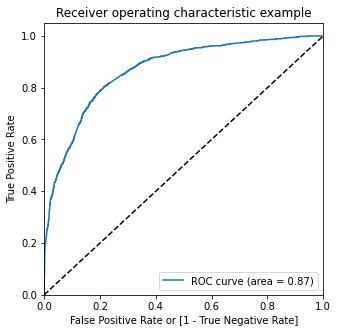

In [71]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve is 0.87 which indicates a good model. Now the sensitivity and specificity tradeoff can be checked to find the optimal cutoff point. 

### Finding optimal cutoff point

In [72]:
# Create columns with different probablity cutoffs
numbers = [float(x) / 10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.315294          0    1    1    1    1    0    0    0   
1          0         0.095056          0    1    0    0    0    0    0    0   
2          1         0.083534          0    1    0    0    0    0    0    0   
3          1         0.384952          0    1    1    1    1    0    0    0   
4          1         0.958299          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [73]:
# Calculate accuracy, sensitivity and specificity at different probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob', 'accuracy', 'sensi', 'speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positives 
# TN = confusion[0,0] # true negatives 
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.569155  0.986505  0.181228
0.2   0.2  0.709482  0.946021  0.489619
0.3   0.3  0.769334  0.897627  0.650087
0.4   0.4  0.792199  0.810610  0.775087
0.5   0.5  0.791078  0.744067  0.834775
0.6   0.6  0.774042  0.671940  0.868945
0.7   0.7  0.741986  0.554211  0.916522
0.8   0.8  0.716655  0.462075  0.953287
0.9   0.9  0.650751  0.293160  0.983131


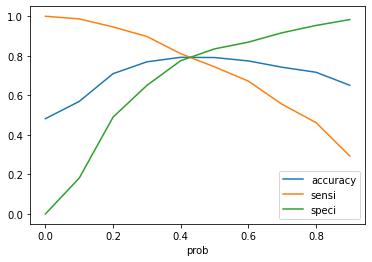

In [74]:
# Plot the cutoff point
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The optimal values of the three metrics are obtained at around 0.42. Therefore, 0.42 is chosen as the cutoff.

In [75]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.315294          0    1    1    1    1    0    0    0   
1          0         0.095056          0    1    0    0    0    0    0    0   
2          1         0.083534          0    1    0    0    0    0    0    0   
3          1         0.384952          0    1    1    1    1    0    0    0   
4          1         0.958299          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [76]:
# Check the accuracy 
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7930957184487784

In [77]:
# Create the confusion matrix once again 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[1820,  492],
       [ 431, 1718]], dtype=int64)

In [78]:
# Evaluate the other metrics 

TP = confusion2[1,1] # true positives
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [79]:
# Calculate sensitivity
TP / float(TP + FN)

0.7994416007445323

In [80]:
# Calculate specificity
TN / float(TN + FP)

0.78719723183391

The cutoff point seems good to go ahead with. 

### Making predictions on the test set 

In [81]:
# Scale the test set using 'transform'
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [82]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4771     0.000000                     0.000000                          1   
6122     0.027888                     0.029049                          0   
9202     0.015936                     0.416813                          0   
6570     0.011952                     0.378961                          0   
2668     0.031873                     0.395246                          0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4771                       0                      1   
6122                       0                      0   
9202                       0                      0   
6570                       0                      0   
2668                       0                      0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
4771                             0                 0   
6122                             0                 0   
9202                             0                 0   
6570                             0                 1   
2668                             0                 0   

      Last Activity_Email Bounced  Last Activity_Had a Phone Conversation  \
4771                            0                                       0   
6122                            0                                       0   
9202                            0                                       0   
6570                            0                                       0   
2668                            0                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
4771                                      0                       1   
6122                                      0                       0   
9202                                      0                       1   
6570                                      0                       1   
2668                                      0                       1   

      What is your current occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                        0   
6570                                        0   
2668                                        0   

      What is your current occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      What is your current occupation_Working Professional  \
4771                                                     1   
6122                                                     0   
9202                                                     0   
6570                                                     0   
2668                                                     0   

      Last Notable Activity_Email Bounced  \
4771                                    0   
6122                                    0   
9202                                    0   
6570                                    0   
2668                                    0   

      Last Notable Activity_Had a Phone Conversation  \
4771                                               0   
6122                                               0   
9202                                               0   
6570                                               0   
2668                                               0   

      Last Notable Activity_Modified  Last Notable Activity_Unreachable  \
4771          

In [83]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

const  TotalVisits  Total Time Spent on Website  \
4771    1.0     0.000000                     0.000000   
6122    1.0     0.027888                     0.029049   
9202    1.0     0.015936                     0.416813   
6570    1.0     0.011952                     0.378961   
2668    1.0     0.031873                     0.395246   
...     ...          ...                          ...   
5828    1.0     0.011952                     0.027289   
6583    1.0     0.011952                     0.152289   
5531    1.0     0.055777                     0.702025   
3056    1.0     0.011952                     0.417694   
4088    1.0     0.019920                     0.530370   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
4771                          1                       0   
6122                          0                       0   
9202                          0                       0   
6570                          0                       0   
2668                          0                       0   
...                         ...                     ...   
5828                          0                       0   
6583                          0                       0   
5531                          0                       0   
3056                          0                       0   
4088                          0                       0   

      Lead Source_Reference  Lead Source_Welingak Website  Do Not Email_Yes  \
4771                      1                             0                 0   
6122                      0                             0                 0   
9202                      0                             0                 0   
6570                      0                             0                 1   
2668                      0                             0                 0   
...                     ...                           ...               ...   
5828                      0                             0                 0   
6583                      0                             0                 0   
5531                      0                             0                 0   
3056                      0                             0                 1   
4088                      0                             0                 0   

      Last Activity_Email Bounced  Last Activity_Had a Phone Conversation  \
4771                            0                                       0   
6122                            0                                       0   
9202                            0                                       0   
6570                            0                                       0   
2668                            0                                       0   
...                           ...                                     ...   
5828                            0                                       0   
6583                            0                                       0   
5531                            0                                       0   
3056                            0                                       0   
4088                            0                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
4771                                      0                       1   
6122                                      0                       0   
9202                                      0                       1   
6570                                      0                       1   
2668                                      0                       1   
...                                     ...                     ...   
5828                                      0                       1   
6583                                      0                       1   
5531                                      0                       0   
3056                        

In [84]:
# Drop the required columns from the test set 
X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation', 'Last Activity_Email Bounced', 'Last Notable Activity_Email Bounced'], 1, inplace = True)

In [85]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))

In [86]:
y_test_pred[:10]

4771    0.996576
6122    0.161700
9202    0.716322
6570    0.322384
2668    0.557496
4233    0.828277
3368    0.759952
9091    0.520619
5972    0.171222
3631    0.794356
dtype: float64

In [87]:
# Convert y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
4771  0.996576
6122  0.161700
9202  0.716322
6570  0.322384
2668  0.557496

In [88]:
# Convert y_test to a dataframe
y_test_df = pd.DataFrame(y_test)

In [89]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [90]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)
y_pred_final.head()

Converted         0
0          1  0.996576
1          0  0.161700
2          0  0.716322
3          1  0.322384
4          1  0.557496

In [91]:
# Rename the column
y_pred_final = y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          1         0.996576
1          0         0.161700
2          0         0.716322
3          1         0.322384
4          1         0.557496

In [92]:
# Make predictions on the test set using 0.42 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.996576                1
1          0         0.161700                0
2          0         0.716322                1
3          1         0.322384                0
4          1         0.557496                1

In [93]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_predicted'])

0.7824267782426778

In [94]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted)
confusion2

array([[773, 223],
       [193, 723]], dtype=int64)

In [95]:
TP = confusion2[1,1] # true positives
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [96]:
# Calculate senstivity
TP / float(TP+FN)

0.7893013100436681

In [97]:
# Calculate specficity
TN / float(TN+FP)

0.7761044176706827

### Precision-Recall review

In [98]:
# Calculate precision = TP / (TP + FP)
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8071680969207471

In [99]:
# Calculate recall = TP / (TP + FN)
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7440670079106562

### Precision and recall tradeoff

In [100]:
# Import library for precision-recall curve
from sklearn.metrics import precision_recall_curve

In [101]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [102]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

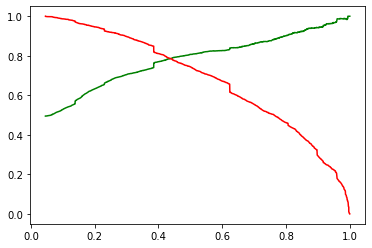

In [103]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [104]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.315294          0    1    1    1    1    0    0    0   
1          0         0.095056          0    1    0    0    0    0    0    0   
2          1         0.083534          0    1    0    0    0    0    0    0   
3          1         0.384952          0    1    1    1    1    0    0    0   
4          1         0.958299          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [105]:
# Check the accuracy 
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7935440484196369

In [106]:
# Create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[1853,  459],
       [ 462, 1687]], dtype=int64)

In [107]:
# Evaluate other metrics
TP = confusion2[1,1] # true positives
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [108]:
# Calculate precision
TP/(TP+FP)

0.7861136999068034

In [109]:
# Calculate recall
TP/(TP+FN)

0.7850162866449512

The cutoff point obtained is good to go ahead with. 

### Making predictions on the test set 

In [111]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4771    0.996576
6122    0.161700
9202    0.716322
6570    0.322384
2668    0.557496
4233    0.828277
3368    0.759952
9091    0.520619
5972    0.171222
3631    0.794356
dtype: float64

In [112]:
# Convert y_pred to a dataframe 
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
4771  0.996576
6122  0.161700
9202  0.716322
6570  0.322384
2668  0.557496

In [113]:
# Convert y_test to dataframe 
y_test_df = pd.DataFrame(y_test)

In [114]:
# Remove index for both dataframes and append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [115]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)
y_pred_final.head()

Converted         0
0          1  0.996576
1          0  0.161700
2          0  0.716322
3          1  0.322384
4          1  0.557496

In [116]:
# Rename the column 
y_pred_final = y_pred_final.rename(columns = {0: 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          1         0.996576
1          0         0.161700
2          0         0.716322
3          1         0.322384
4          1         0.557496

In [119]:
# Make predictions on the test set using 0.44 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.996576                1
1          0         0.161700                0
2          0         0.716322                1
3          1         0.322384                0
4          1         0.557496                1

In [120]:
# Check the overall accuracy 
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_predicted'])

0.7834728033472803

In [121]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
confusion2

array([[793, 203],
       [211, 705]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positives 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Calculate precision
TP/(TP+FP)

0.776431718061674

In [124]:
# Calculate recall 
TP/(TP+FN)

0.769650655021834

### Summary

The model ends up using 14 features and yields an accuracy of 79%. The numerical features "Total Visits" and "The Total Time Spent on Website" emerged as the best leads followed by the categorical features "Lead Origin_Lead Add Form", "Lead Source_Olark Chat", "Lead Source_Welingak Website" and "Do Not Email_Yes". Based on these features, the company can now lay out strategy to achieve better conversion rates and get more people to buy their courses. The sensitivity of 79.9% and specificity of 78.7% are close to the target of 80% conversion rate as expected by the company.  